## Problem Statement/Goal
 - (Problem statement copied from [the contest page](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/).)
 - The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
 - Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 - Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.


# Data Dictionary

|Variable                 |Description|
|-------------------------|----------------|
|Item_Identifier          |Unique product ID|
|Item_Weight              |Weight of product|
|Item_Fat_Content         |Whether the product is low fat or not|
Item_Visibility           |The % of total display area of all products in a store allocated to the particular product|
|Item_Type                |The category to which the product belongs|
|Item_MRP                 |Maximum Retail Price (list price) of the product|
|Outlet_Identifier        |Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size              |The size of the store in terms of ground area covered|
Outlet_Location_Type      |The type of city in which the store is located|
Outlet_Type               |Whether the outlet is just a grocery store or some sort of supermarket|
Item_Outlet_Sales         |Sales of the product in the particulat store.|

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split

## Data Collection

In [3]:
raw_df = pd.read_csv('./data/Train_UWu5bXk.csv')

## Initial Viewing of Data

In [4]:
raw_df.isna().sum()
# The two columns that have missing data are Item_Weight and Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Getting a sense of all of the qualitative columns
for column in raw_df.columns:
    if len(raw_df[column].value_counts()) < 15:
        print('-----------------')
        print(raw_df[column].value_counts())

-----------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
-----------------
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
-----------------
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
-----------------
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
-----------------
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
-----------------
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


## Cleaning

In [8]:
list_dicts = []
for i in raw_df['Outlet_Identifier'].unique():
    mask = raw_df['Outlet_Identifier'] == str(i)
    temp_dict = {
        'ID'                 : i,
        'Size'               : raw_df[mask]['Outlet_Size'].unique()[0],
        'Establishment_Year' : raw_df[mask]['Outlet_Establishment_Year'].unique()[0],
        'Location_Type'      : raw_df[mask]['Outlet_Location_Type'].unique()[0],
        'Type'               : raw_df[mask]['Outlet_Type'].unique()[0]}
    list_dicts.append(temp_dict)

outlet_df = pd.DataFrame(list_dicts, 
                         columns=['ID','Establishment_Year',
                                'Location_Type','Type','Size'])

outlet_df.set_index('ID', inplace= True)
outlet_df.sort_values('Location_Type')

,Establishment_Year,Location_Type,Type,Size
ID,,,,
OUT049,1999,Tier 1,Supermarket Type1,Medium
OUT046,1997,Tier 1,Supermarket Type1,Small
OUT019,1985,Tier 1,Grocery Store,Small
OUT045,2002,Tier 2,Supermarket Type1,NaN
OUT017,2007,Tier 2,Supermarket Type1,NaN
OUT035,2004,Tier 2,Supermarket Type1,Small
OUT018,2009,Tier 3,Supermarket Type2,Medium
OUT010,1998,Tier 3,Grocery Store,NaN
OUT013,1987,Tier 3,Supermarket Type1,High


OUT010 is likely a Small sized Outlet considering it is a grocery store which is the same tye as OUT019.  We can likely assume that they are of comparable size.

OUT045 & OUT017 seem to have the most in common with OUT035 because they all have the same Location and store types.  Furthermore they were built all within 5 years of eachother.  Finally it would make a certain kind of sense for the company to build more small small locations that large or medium to help maximize the amount of space covered while minimizing the cost of creating a location due to a larger size.  As such I will be filling in all of the NaN size columns with "Small"

In [9]:
df = raw_df

# Filling all of these np.nan's with 'Small'
df['Outlet_Size'].fillna('Small', inplace = True)

# Making Fat Content labels consistent
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Regular','reg'], 'Reg').replace(['Low Fat', 'low fat'], 'LF')


# CODE FOR CONNECTING ITEMS TO THEIR WEIGHTS
ID_values = [ i for i in weight_df['Item_Identifier'].unique()]
num_dict = {}
for i in ID_values:
    mask = weight_df['Item_Identifier'].dropna() == str(i)
    value = [i for i in weight_df[mask]['Item_Weight'].dropna().unique()]
    try:
        num_dict[str(i)] = value[0]
    except IndexError:
        pass

# Filling item weights based on their identified code number
df['Item_Weight'].fillna(df['Item_Identifier'].map(num_dict), inplace = True)

# Dropping the 4 remaining rows
df.dropna(inplace = True)

NameError: name 'weight_df' is not defined

## Exploritory Data Analysis

## Modeling

#### Imports & Initiations

#### Historical Lists of Features & Their Results

# Laboritory!
 - The place for all the code that I'm currently working on.  
 - This is to keep the rest of the notebook clean.

In [ ]:
plt.boxplot()
plt.hist
plt.hist2d
plt.plot
plt.scatter
plt.violinplot

In [6]:
raw_columns = [column for column in raw_df.columns][1:]

In [111]:
raw_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [222]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [229]:
mask = df['Item_Weight'].isna()
df[mask]
# The remaining items that have np.nan's as their item weight are all single instances of each item.  
# As such, because it's such a small number of items I'll simply be dropping the 4 of them

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Reg,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Reg,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Reg,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Reg,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [228]:

mask = df['Item_Identifier'] == 'FDQ60'
df[mask]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Reg,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [16]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
#df = 
df = pd.get_dummies(raw_df.drop(['Item_Identifier'], axis=1))

In [30]:
df.drop(['Item_Fat_Content_Reg','Item_Type_Others', 'Outlet_Size_High', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store'], axis = 1, inplace = True)

In [32]:
raw_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
df.rename({'Item_Outlet_Sales': 'Target'}, axis = 1, inplace = True)

In [55]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Target', 'Item_Fat_Content_LF',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Supermarket Type1', 'Out

In [27]:
df.rename({
    'Outlet_Establishment_Year', 
    'Item_Outlet_Sales', 
    'Item_Fat_Content_LF',
    'Item_Type_Baking Goods', 
    'Item_Type_Breads',
    'Item_Type_Breakfast', 
    'Item_Type_Canned', 
    'Item_Type_Dairy',
    'Item_Type_Frozen Foods', 
    'Item_Type_Fruits and Vegetables',
    'Item_Type_Hard Drinks', 
    'Item_Type_Health and Hygiene',
    'Item_Type_Household', 
    'Item_Type_Meat', 
    'Item_Type_Seafood', 
    'Item_Type_Snack Foods', 
    'Item_Type_Soft Drinks',
    'Item_Type_Starchy Foods', 
    'Outlet_Identifier_OUT010',
    'Outlet_Identifier_OUT013', 
    'Outlet_Identifier_OUT017',
    'Outlet_Identifier_OUT018', 
    'Outlet_Identifier_OUT019',
    'Outlet_Identifier_OUT027', 
    'Outlet_Identifier_OUT035',
    'Outlet_Identifier_OUT045', 
    'Outlet_Identifier_OUT046',
    'Outlet_Identifier_OUT049', 
    'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'
                 }, axis = 1, inplace = True)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Reg', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Ti

In [87]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


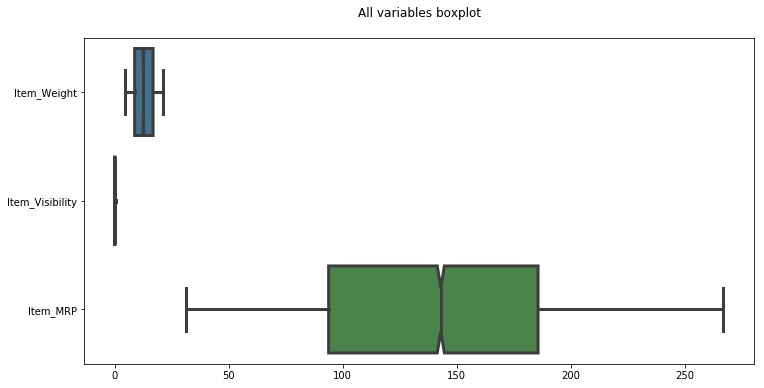

In [96]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=raw_df[['Item_Weight','Item_Visibility', 'Item_MRP']], 
                 orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

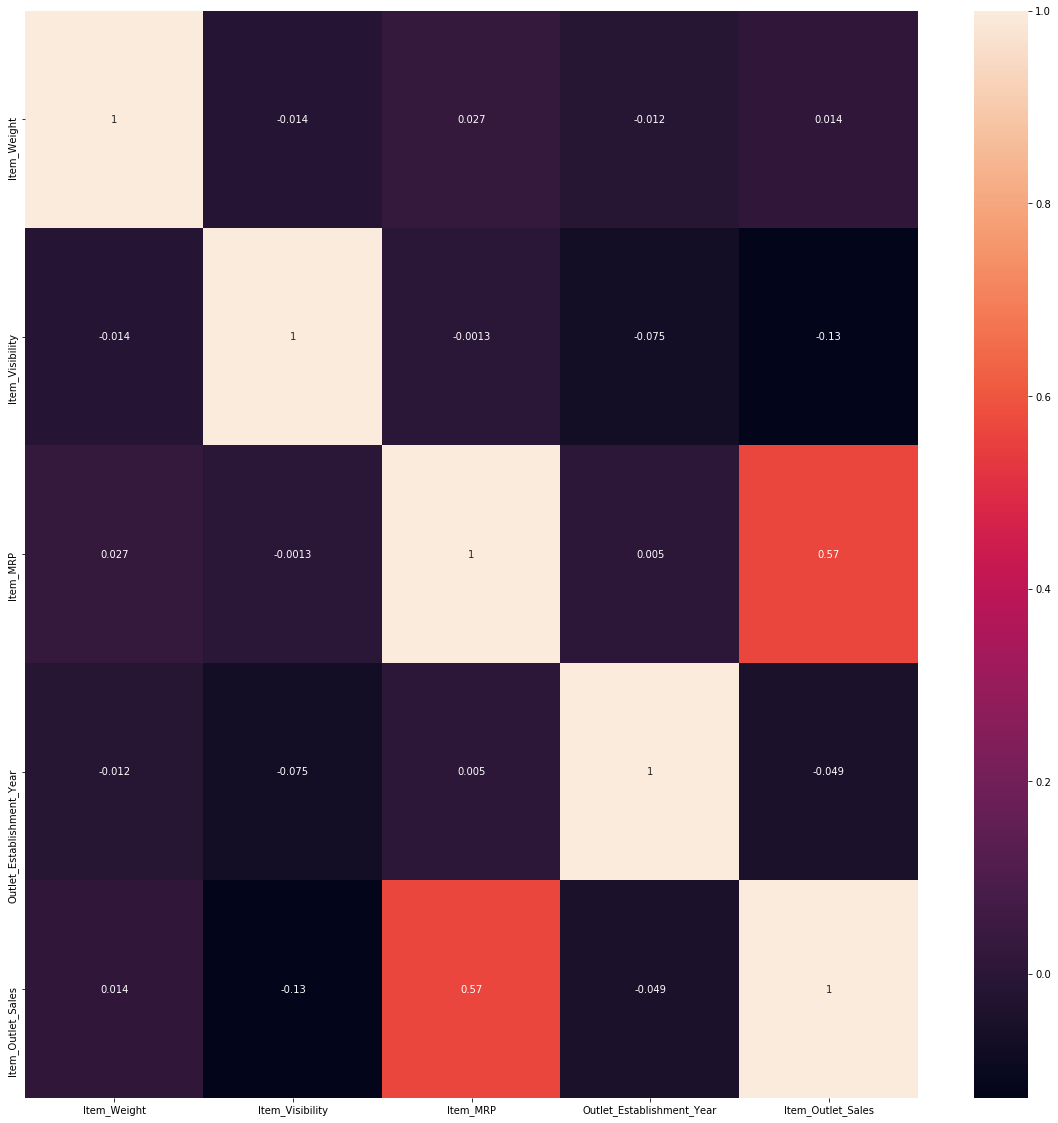

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(raw_df.corr(), annot=True);

In [100]:
df.shape

(8523, 38)

In [101]:
raw_df.shape

(8523, 12)

In [103]:
df.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Target                             float64
Item_Fat_Content_LF                  uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Identifier_OUT010             uint8
Outlet_Identifier_OUT013             uint8
Outlet_Iden

In [102]:
raw_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [109]:
df.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Target                             float64
Item_Fat_Content_LF                  uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Identifier_OUT010             uint8
Outlet_Identifier_OUT013             uint8
Outlet_Iden

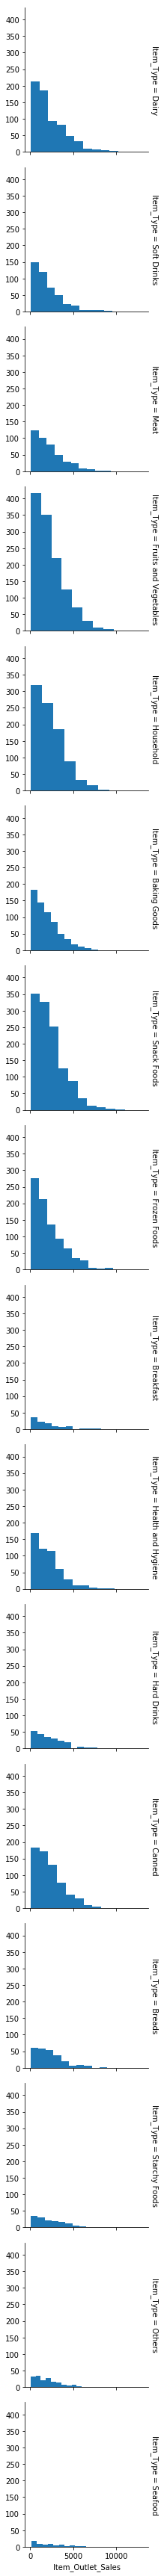

In [114]:
Grid = sns.FacetGrid(raw_df, row="Item_Type", margin_titles=True)
Grid.map(plt.hist,'Item_Outlet_Sales', bins = 10);

In [ ]:
Grid = sns.FacetGrid(train_df, col="Class_col_1", row="Class_col_2(Target)", margin_titles=True)
Grid.map(plt.hist,'Quantative_col', bins = 15);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


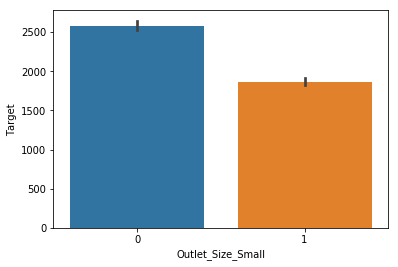

In [119]:
sns.barplot(data = df, x = "Outlet_Size_Small", y = "Target");

In [172]:
weight_df = raw_df

# Filling all of these np.nan's with 'Small'
weight_df['Outlet_Size'].fillna('Small', inplace = True)

# Making Fat Content labels consistent
weight_df['Item_Fat_Content'] = weight_df['Item_Fat_Content'].replace(['Regular','reg'], 'Reg').replace(['Low Fat', 'low fat'], 'LF')

#weight_df['Item_Weight'].dropna(inplace=True)

In [156]:
mask = weight_df['Item_Weight'].isna()
weight_df[mask]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,LF,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Reg,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,LF,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Reg,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Reg,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Reg,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,LF,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Reg,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,LF,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [ ]:
Grid = sns.FacetGrid(weight_df, row="Item_Type", margin_titles=True)
Grid.map(plt.hist,'Item_Outlet_Sales', bins = 10);

In [159]:
weight_df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [201]:
ID_values = [ i for i in weight_df['Item_Identifier'].unique()]
nums = []
num_dict = {}
for i in ID_values:
    mask = weight_df['Item_Identifier'] == str(i)
    percent_na = weight_df[mask].isna().sum().sum()/weight_df[mask]['Item_Weight'].sum().sum()
    list_uniques = [ i for i in weight_df[mask]['Item_Weight'].unique()]
    if np.nan in list_uniques:
        list_uniques.remove(np.nan)
    if len(list_uniques) > 1:
        print(list_uniques)
    #nums.append()
    #num_dict[str(i)] = 

[9.3, nan]
[5.92, nan]
[17.5, nan]
[19.2, nan]
[13.65, nan]
[nan, 19.0]
[16.2, nan]
[19.2, nan]
[11.8, nan]
[18.5, nan]
[15.1, nan]
[17.6, nan]
[9.0, nan]
[11.8, nan]
[nan, 8.26]
[13.35, nan]
[nan, 8.315]
[14.6, nan]
[nan, 15.5]
[7.645, nan]
[11.65, nan]
[5.925, nan]
[nan, 14.5]
[19.25, nan]
[18.6, nan]
[18.7, nan]
[17.85, nan]
[17.5, nan]
[10.0, nan]
[nan, 20.2]
[8.85, nan]
[nan, 6.385]
[nan, 15.25]
[9.8, nan]
[13.6, nan]
[21.35, nan]
[6.42, nan]
[19.6, nan]
[10.0, nan]
[15.85, nan]
[nan, 10.195]
[10.895, nan]
[12.15, nan]
[9.195, nan]
[8.365, nan]
[15.1, nan]
[nan, 5.94]
[10.0, nan]
[7.97, nan]
[nan, 6.215]
[nan, 15.5]
[nan, 17.5]
[17.7, nan]
[19.35, nan]
[17.6, nan]
[8.645, nan]
[15.6, nan]
[18.25, nan]
[7.855, nan]
[7.825, nan]
[8.39, nan]
[12.85, nan]
[nan, 13.35]
[19.0, nan]
[5.905, nan]
[7.76, nan]
[11.8, nan]
[16.75, nan]
[nan, 18.85]
[nan, 12.6]
[6.055, nan]
[nan, 20.2]
[6.305, nan]
[20.85, nan]
[20.75, nan]
[8.895, nan]
[19.6, nan]
[19.7, nan]
[9.8, nan]
[nan, 7.93]
[12.15, n

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


[11.6, nan]
[16.75, nan]
[12.15, nan]
[nan, 12.35]
[9.3, nan]
[10.195, nan]
[nan, 7.52]
[7.68, nan]
[9.3, nan]
[16.0, nan]
[19.2, nan]
[20.75, nan]
[nan, 11.65]
[13.5, nan]
[8.21, nan]
[18.1, nan]
[20.25, nan]
[nan, 20.7]
[8.185, nan]
[18.2, nan]
[14.5, nan]
[9.5, nan]
[19.85, nan]
[14.0, nan]
[nan, 15.7]
[17.25, nan]
[12.15, nan]
[16.35, nan]
[nan, 7.275]
[8.42, nan]
[16.85, nan]
[nan, 19.7]
[15.15, nan]
[13.5, nan]
[17.5, nan]
[17.5, nan]
[9.195, nan]
[nan, 12.1]
[21.1, nan]
[15.6, nan]
[16.1, nan]
[12.85, nan]
[14.65, nan]
[15.85, nan]
[nan, 14.6]
[16.0, nan]
[nan, 13.0]
[18.2, nan]
[nan, 13.85]
[nan, 20.2]
[15.6, nan]
[8.02, nan]
[11.0, nan]
[nan, 5.785]
[7.235, nan]
[nan, 14.15]
[nan, 17.7]
[18.0, nan]
[7.475, nan]
[11.35, nan]
[17.1, nan]
[nan, 16.1]
[15.25, nan]
[10.5, nan]
[nan, 6.825]
[nan, 19.7]
[nan, 6.365]
[nan, 17.2]
[9.395, nan]
[nan, 20.2]
[13.5, nan]
[19.35, nan]
[nan, 12.3]
[11.5, nan]
[9.8, nan]
[nan, 6.035]
[18.25, nan]
[7.855, nan]
[10.1, nan]
[16.25, nan]
[17.6, na

In [145]:
raw_df[raw_df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,LF,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Reg,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,LF,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Reg,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Reg,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Reg,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,LF,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Reg,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,LF,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

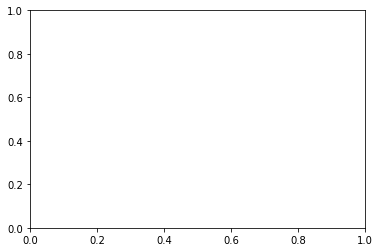

In [10]:
plt.hist(raw_df['Item_Weight']);

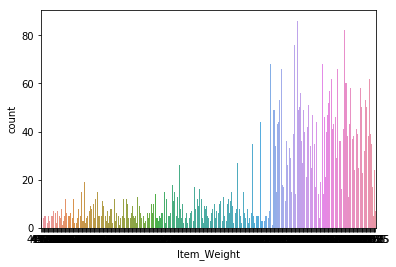

In [13]:
sns.countplot(raw_df['Item_Weight']);

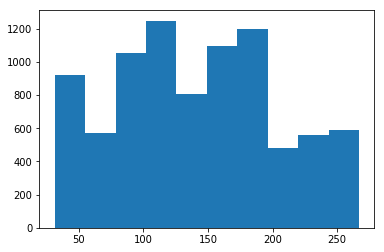

In [127]:
plt.hist(raw_df['Item_MRP']);

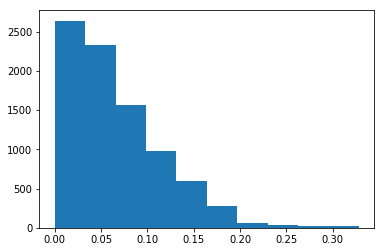

In [126]:
plt.hist(raw_df['Item_Visibility']);

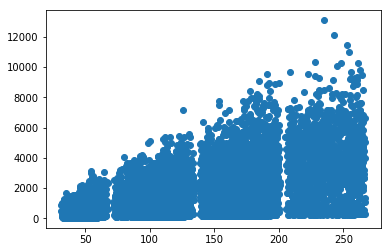

In [143]:
plt.scatter(y = df['Target'], x = df['Item_MRP']);

In [125]:
raw_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [31]:
def list_corrs(df, target):
    return df.corr().sort_values([str(target)])[str(target)]
def heatmap_correlations(df, size = 20):
    fig, ax = plt.subplots(figsize=(size,size))
    sns.heatmap(df.corr(), annot=True)
    return

In [33]:
list_corrs(df, 'Item_Outlet_Sales')

Outlet_Identifier_OUT010          -0.284883
Outlet_Identifier_OUT019          -0.277250
Outlet_Size_Small                 -0.208912
Item_Visibility                   -0.128625
Outlet_Location_Type_Tier 1       -0.111287
Outlet_Establishment_Year         -0.049135
Item_Type_Baking Goods            -0.038381
Outlet_Type_Supermarket Type2     -0.038059
Outlet_Identifier_OUT018          -0.038059
Item_Type_Health and Hygiene      -0.025587
Item_Type_Soft Drinks             -0.024040
Item_Fat_Content_LF               -0.018719
Item_Type_Frozen Foods            -0.009482
Item_Type_Breakfast               -0.004656
Item_Type_Hard Drinks             -0.003956
Item_Type_Meat                    -0.002995
Outlet_Identifier_OUT045           0.002274
Item_Type_Breads                   0.002332
Item_Type_Seafood                  0.007380
Item_Type_Canned                   0.007387
Item_Type_Dairy                    0.008858
Item_Weight                        0.014123
Item_Type_Starchy Foods         

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
print(raw_df['Item_Weight'].mean())
print(raw_df['Item_Weight'].median())
print(raw_df['Item_Weight'].mode())

12.857645184136183
12.6
0    12.15
dtype: float64


In [45]:
df['Item_Weight'].fillna(12.6, inplace = True)

In [47]:
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']
X = df[features]
y = df['Item_Outlet_Sales'] 
lr = LinearRegression()
cross_val_score(lr, X, y).mean()

0.5585045550342801

In [74]:
corrs = df.corr()[['Target']]
mask = abs(corrs['Target']) > 0.05
above_corr = [i for i in corrs[mask].index if i != 'Target']
above_corr

['Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type3']

In [67]:
df['Target']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     858.8820
8517    36

In [68]:
X = df[above_zero_five]
y = df['Target'] 
lr = LinearRegression()
cross_val_score(lr, X, y)

array([0.56087672, 0.5567206 , 0.5655567 ])

In [37]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Supermarket T

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

def test_model(df, test_model, features, target = 'Target'):
    model = test_model
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target]) 
    model = model.fit(X_train,y_train)

    print('Train:', model.score(X_train,y_train))
    print('Test: ',  model.score(X_test,y_test))
    return

print('KNeighborsRegressor')
test_model(df, KNeighborsRegressor(), features)
print('DecisionTreeRegressor')
test_model(df, DecisionTreeRegressor(), features)
print('BaggingRegressor')
test_model(df, BaggingRegressor(), features)
print('RandomForestRegressor')
test_model(df, RandomForestRegressor(), features)
print('AdaBoostRegressor')
test_model(df, AdaBoostRegressor(), features)
print('ExtraTreesRegressor')
test_model(df, ExtraTreesRegressor(), features)

# Ugh, fine, I'll do some more Feature Engineering

KNeighborsClassifier
Train: 0.6445466356414997
Test:  0.46337399900328846
DecisionTreeClassifier
Train: 1.0
Test:  0.20203108984394458
BaggingClassifier
Train: 0.9176736907690608
Test:  0.5452557246365991
RandomForestClassifier
Train: 0.9174132562701102
Test:  0.5140520440890821
AdaBoostClassifier
Train: 0.4480139275349677
Test:  0.45290540638511834
ExtraTreesClassifier
Train: 1.0
Test:  0.494577013403433
SVC
Train: -0.03458680091360633
Test:  -0.033849244546837465


In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import 

def test_model(df, test_model, features, target = 'Target'):
    model = test_model
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target]) 
    model = model.fit(X_train,y_train)

    print('Train:', model.score(X_train,y_train))
    print('Test: ',  model.score(X_test,y_test))
    return

print('KNeighborsRegressor')
test_model(df, KNeighborsRegressor(), above_corr)
print('DecisionTreeRegressor')
test_model(df, DecisionTreeRegressor(), above_corr)
print('BaggingRegressor')
test_model(df, BaggingRegressor(), above_corr)
print('RandomForestRegressor')
test_model(df, RandomForestRegressor(), above_corr)
print('AdaBoostRegressor')
test_model(df, AdaBoostRegressor(), above_corr)
print('ExtraTreesRegressor')
test_model(df, ExtraTreesRegressor(), above_corr)

# Ugh, fine, I'll do some more Feature Engineering

KNeighborsClassifier
Train: 0.6709034651575343
Test:  0.4995268653974049
DecisionTreeClassifier
Train: 1.0
Test:  0.17589387059549774
BaggingClassifier
Train: 0.9180768260622056
Test:  0.498125251066068
RandomForestClassifier
Train: 0.9171954381755969
Test:  0.5035584618300852
AdaBoostClassifier
Train: 0.43695601500638137
Test:  0.3824856498056886
ExtraTreesClassifier
Train: 1.0
Test:  0.45252598047095277
SVC
Train: -0.01002490131905387
Test:  -0.0030855542610690456


In [81]:
#poly.fit_transform(
df[features]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,1,0,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,10.395,0.000000,51.4008,2009,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,13.650,0.012741,57.6588,1987,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,12.600,0.127470,107.7622,1985,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,16.200,0.016687,96.9726,2002,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
9,19.200,0.094450,187.8214,2007,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [85]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#poly = PolynomialFeatures(include_bias=False)
#X_poly = poly.fit_transform(df[features])


#poly.get_feature_names(features)
#pd.DataFrame(X_poly, columns=poly.get_feature_names(features)).head()

X = features
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

print('KNeighborsClassifier')
test_model(df, KNeighborsRegressor(), X_scaled)
print('DecisionTreeClassifier')
test_model(df, DecisionTreeRegressor(), X_scaled)
print('BaggingClassifier')
test_model(df, BaggingRegressor(), X_scaled)
print('RandomForestClassifier')
test_model(df, RandomForestRegressor(), X_scaled)
print('AdaBoostClassifier')
test_model(df, AdaBoostRegressor(), X_scaled)
print('ExtraTreesClassifier')
test_model(df, ExtraTreesRegressor(), X_scaled)
print('SVC')
test_model(df, SVR(), X_scaled)

# Ugh, fine, I'll do some more Feature Engineering

ValueError: could not convert string to float: 'Item_Weight'

## Code Recycling Bin
- For when I'm not sure I'm ready to delete some old code yet.

In [90]:
list_dicts = []
for i in raw_df['Outlet_Identifier'].unique():
    print(i)
    mask = raw_df['Outlet_Identifier'] == str(i)
    print(raw_df[mask]['Outlet_Size'].unique())
    print(raw_df[mask]['Outlet_Establishment_Year'].unique())
    print(raw_df[mask]['Outlet_Location_Type'].unique())
    print(raw_df[mask]['Outlet_Type'].unique())
    print('--------------')
    #dictt = {
        
    #}

OUT049
['Medium']
[1999]
['Tier 1']
['Supermarket Type1']
--------------
OUT018
['Medium']
[2009]
['Tier 3']
['Supermarket Type2']
--------------
OUT010
[nan]
[1998]
['Tier 3']
['Grocery Store']
--------------
OUT013
['High']
[1987]
['Tier 3']
['Supermarket Type1']
--------------
OUT027
['Medium']
[1985]
['Tier 3']
['Supermarket Type3']
--------------
OUT045
[nan]
[2002]
['Tier 2']
['Supermarket Type1']
--------------
OUT017
[nan]
[2007]
['Tier 2']
['Supermarket Type1']
--------------
OUT046
['Small']
[1997]
['Tier 1']
['Supermarket Type1']
--------------
OUT035
['Small']
[2004]
['Tier 2']
['Supermarket Type1']
--------------
OUT019
['Small']
[1985]
['Tier 1']
['Grocery Store']
--------------
